# Customer Segmentation using RFM Analysis

## Introduction

In this notebook, we will perform customer segmentation using the **RFM (Recency, Frequency, Monetary)** analysis technique. This approach allows us to classify customers based on their purchasing behavior, specifically by measuring:
- **Recency**: The number of days since their last purchase.
- **Frequency**: The number of purchases over a specified period.
- **Monetary Value**: The total amount spent by each customer.

By leveraging these metrics, we aim to identify and segment customers into meaningful groups, providing insights for targeted marketing campaigns and personalized interactions.

## Dataset Overview

The dataset we are working with contains various features describing customer demographics, purchasing behaviors, and responses to marketing campaigns. Below is a brief description of the relevant features:

- `AcceptedCmp1`: 1 if the customer accepted the offer in the 1st campaign; 0 otherwise.
- `AcceptedCmp2`: 1 if the customer accepted the offer in the 2nd campaign; 0 otherwise.
- `AcceptedCmp3`: 1 if the customer accepted the offer in the 3rd campaign; 0 otherwise.
- `AcceptedCmp4`: 1 if the customer accepted the offer in the 4th campaign; 0 otherwise.
- `AcceptedCmp5`: 1 if the customer accepted the offer in the 5th campaign; 0 otherwise.
- `Response` (target): 1 if the customer accepted the offer in the last campaign; 0 otherwise.
- `Complain`: 1 if the customer complained in the last 2 years; 0 otherwise.
- `DtCustomer`: Date when the customer enrolled with the company.
- `Education`: Customer’s highest level of education.
- `Marital`: Customer’s marital status.
- `Kidhome`: Number of small children in the customer’s household.
- `Teenhome`: Number of teenagers in the customer’s household.
- `Income`: Customer’s yearly household income.
- `MntFishProducts`: Amount spent on fish products in the last 2 years.
- `MntMeatProducts`: Amount spent on meat products in the last 2 years.
- `MntFruits`: Amount spent on fruit products in the last 2 years.
- `MntSweetProducts`: Amount spent on sweet products in the last 2 years.
- `MntWines`: Amount spent on wine products in the last 2 years.
- `MntGoldProds`: Amount spent on gold products in the last 2 years.
- `NumDealsPurchases`: Number of purchases made with a discount.
- `NumCatalogPurchases`: Number of purchases made using a catalog.
- `NumStorePurchases`: Number of purchases made directly in stores.
- `NumWebPurchases`: Number of purchases made through the company’s website.
- `NumWebVisitsMonth`: Number of visits to the company’s website in the last month.
- `Recency`: Number of days since the last purchase.

### Source

The dataset is sourced from:
> **O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner.** SAS Institute, 2014.

With this dataset, we aim to analyze customer behavior, segment customers based on RFM metrics, and evaluate the success of marketing campaigns based on each segment’s receptivity.


## Basic Import


In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
data = pd.read_csv('/kaggle/input/arketing-campaign/marketing_campaign.csv', sep=';')
df = data.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
def check_df(dataframe, head=5):
    print("################## Shape ####################")
    print(dataframe.shape)
    print("################## Types ####################")
    print(dataframe.dtypes)
    print("################## NA ####################")
    print(dataframe.isnull().mean()*100)
    print("################## Quantiles ####################")
check_df(df, 10)

################## Shape ####################
(2240, 29)
################## Types ####################
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int6

In [4]:
df_cleaned = df.dropna().reset_index(drop = True)

## Feature Engineering

To enhance our segmentation and analysis, we will create additional features that may prove useful for deeper insights and model performance. These new features are designed to capture specific behaviors and characteristics of customers, helping us to better understand and differentiate each segment.


In [5]:
def education_level(education):
    if education in ["Graduation","phD","Master"]:
        return "high"
    elif education in ["Basic"]:
        return "Middle"
    else:
        return "Low"
    
df_cleaned["Education_level"] = df_cleaned["Education"].apply(education_level)

In [6]:
def living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living with Others'

df_cleaned['Living_Status'] = df_cleaned['Marital_Status'].apply(living_status)


In [7]:
df_cleaned["Age"] = 2022 - df_cleaned["Year_Birth"]

In [8]:
df_cleaned['Total_Campaigns_Accepted'] = df_cleaned[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum(axis=1)

df_cleaned['Spent'] = df_cleaned['MntWines']+df_cleaned['MntFruits']+ df_cleaned['MntMeatProducts'] +df_cleaned['MntFishProducts']+df_cleaned['MntSweetProducts']+ df_cleaned['MntGoldProds']

df_cleaned['NumPurchases'] = df_cleaned['NumDealsPurchases'] + df_cleaned['NumCatalogPurchases'] + df_cleaned['NumStorePurchases'] + df_cleaned['NumWebPurchases']

df_cleaned['Average_Spend'] = (df_cleaned[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df_cleaned['NumDealsPurchases']

df_cleaned['Is_Parent'] = (df_cleaned['Kidhome'] + df_cleaned['Teenhome'] > 0).astype(int)

df_cleaned['avg_web_visits'] = df_cleaned['NumWebVisitsMonth'] / 12


df_cleaned['online_purchase_ratio'] = df_cleaned['NumWebPurchases'] / (df_cleaned['NumWebPurchases'] + df_cleaned['NumCatalogPurchases'] + df_cleaned['NumStorePurchases'])

col_to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth']
df_cleaned = df_cleaned.drop(col_to_drop, axis=1)

## EDA

In [9]:
num_col = df_cleaned.select_dtypes(['int64','float64'])
cat_col = df_cleaned.select_dtypes(['object'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


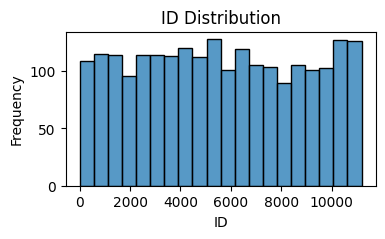

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


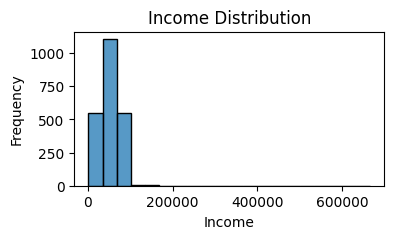

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


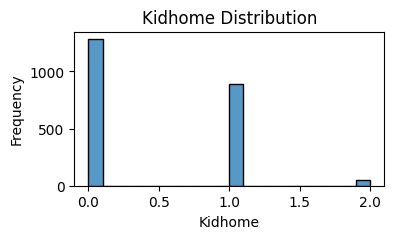

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


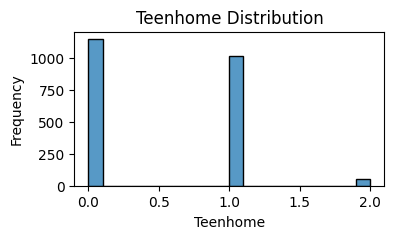

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


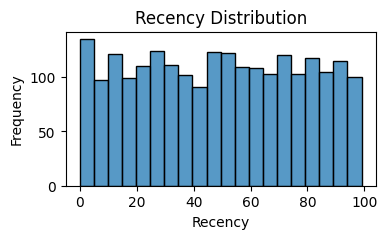

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


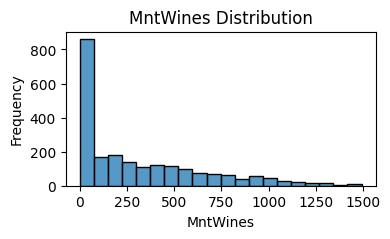

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


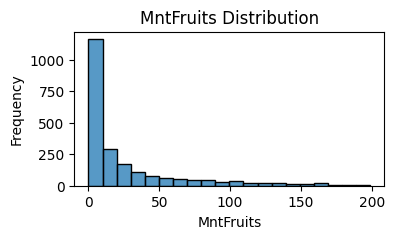

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


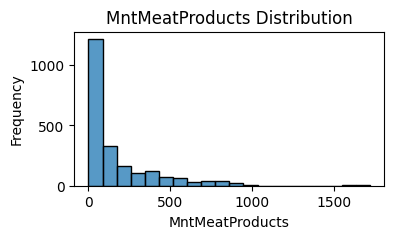

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


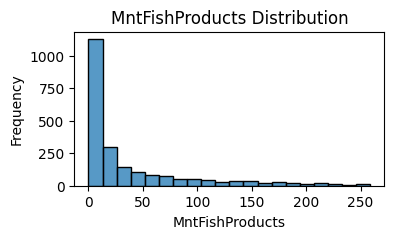

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


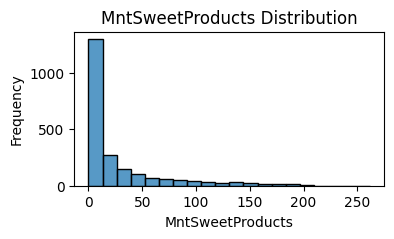

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


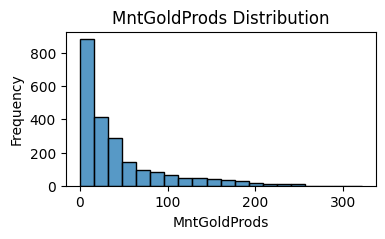

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


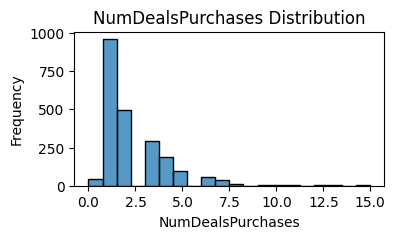

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


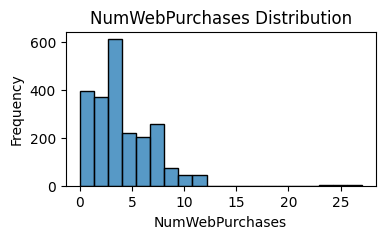

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


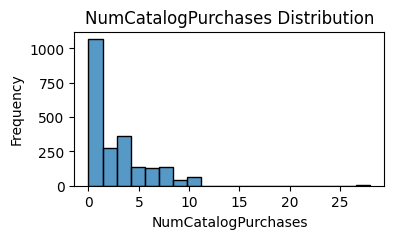

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


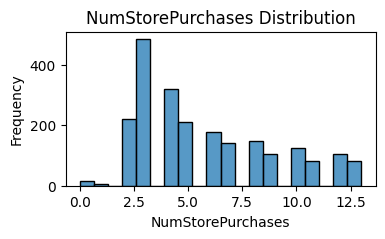

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


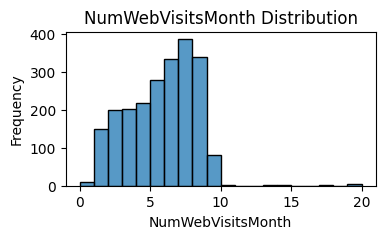

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


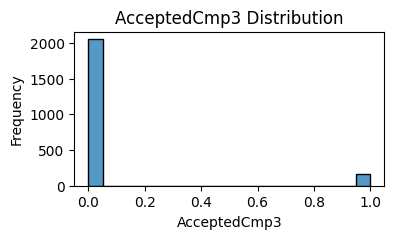

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


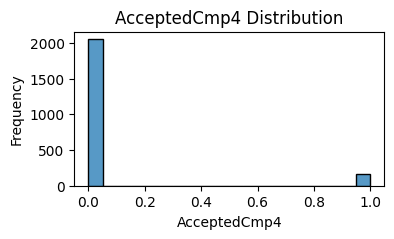

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


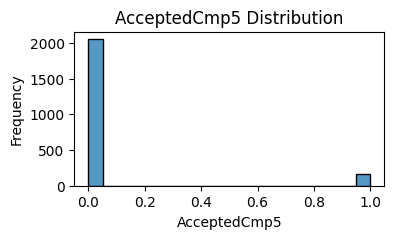

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


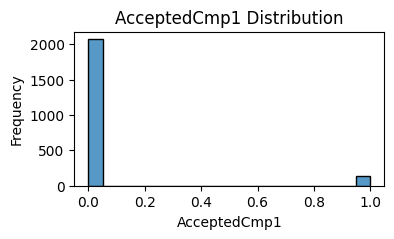

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


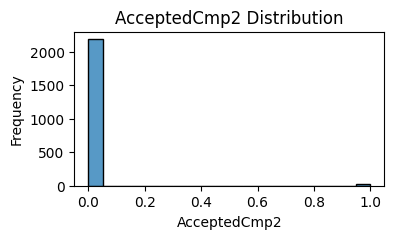

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


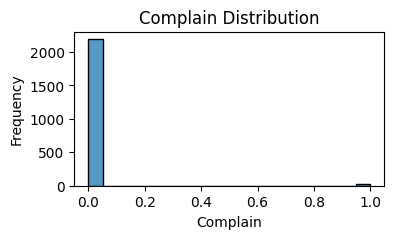

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


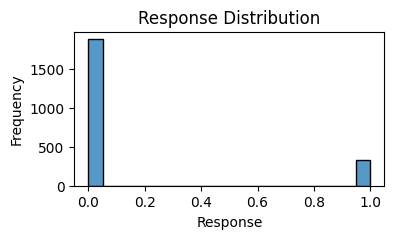

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


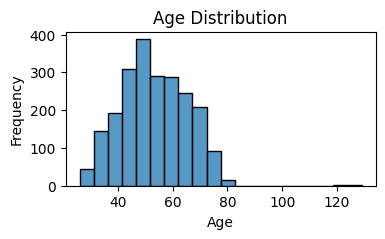

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


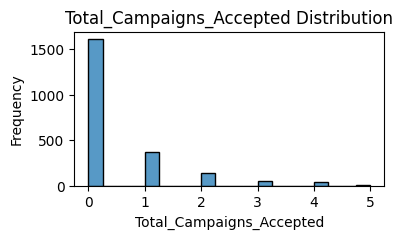

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


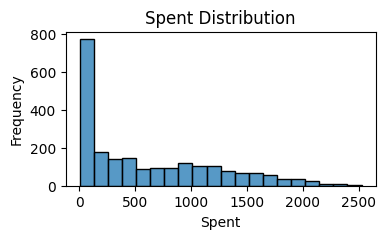

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


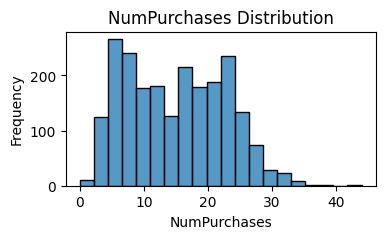

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


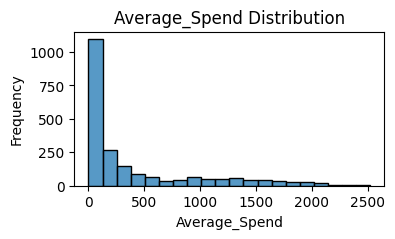

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


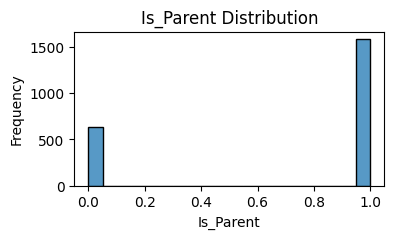

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


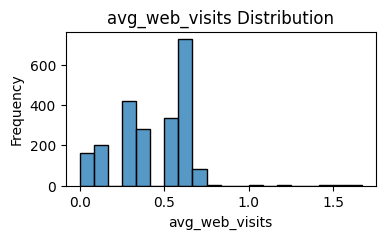

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


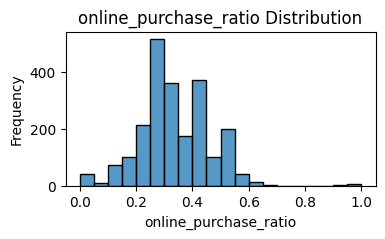

In [10]:
for col in num_col:
    plt.figure(figsize=(4, 2))
    sns.histplot(df_cleaned[col], bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

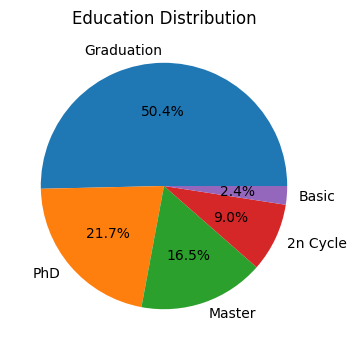

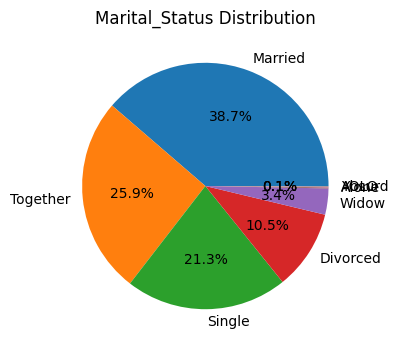

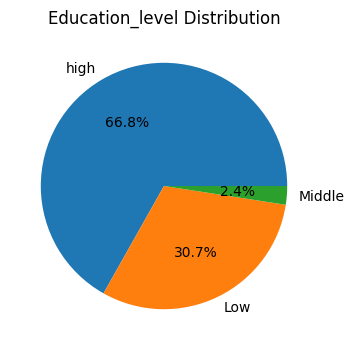

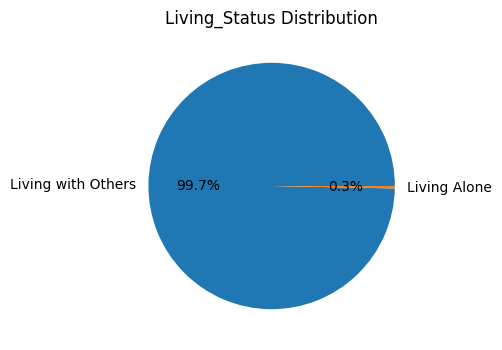

In [11]:
for col in cat_col:
    plt.figure(figsize=(6, 4))
    df_cleaned[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{col} Distribution')
    plt.ylabel('')
    plt.show()

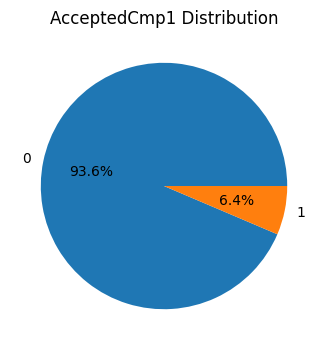

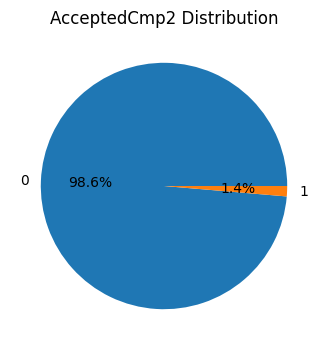

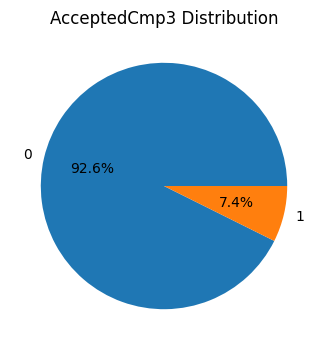

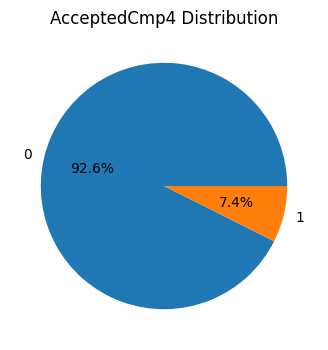

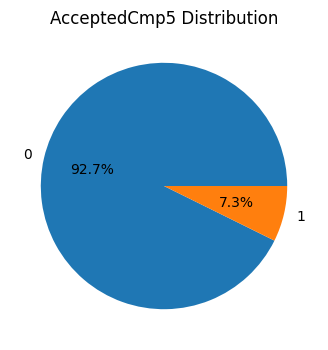

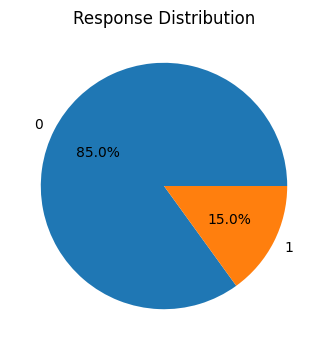

In [12]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
for col in campaign_cols:
    plt.figure(figsize=(6, 4))
    df_cleaned[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{col} Distribution')
    plt.ylabel('')
    plt.show()

########## AcceptedCmp1 #############


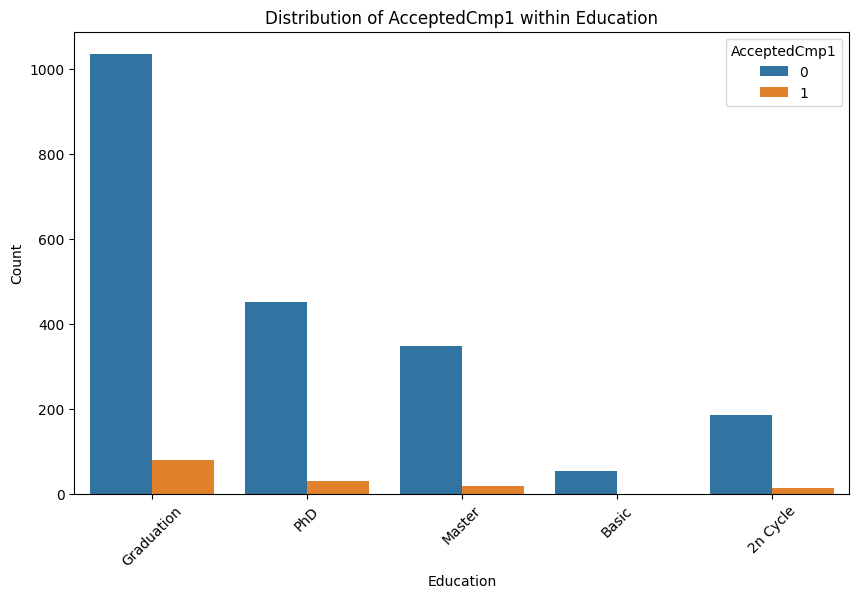

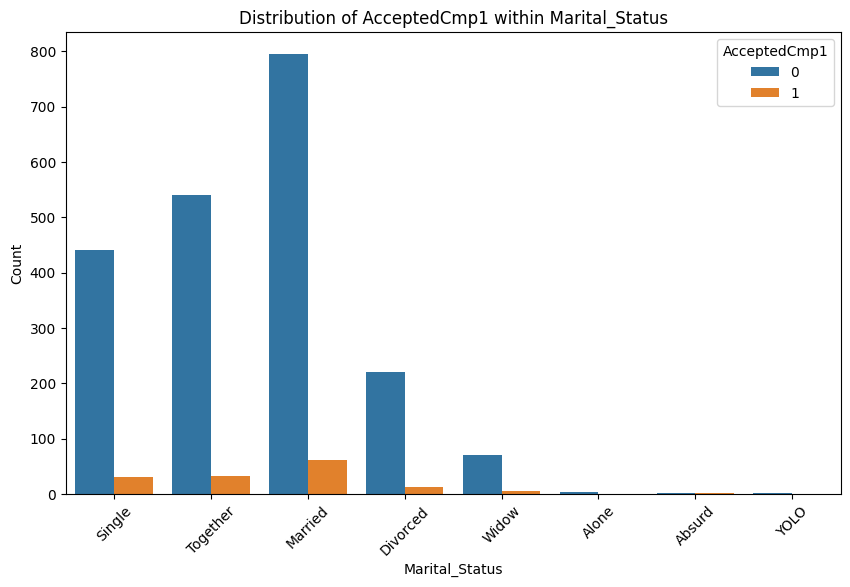

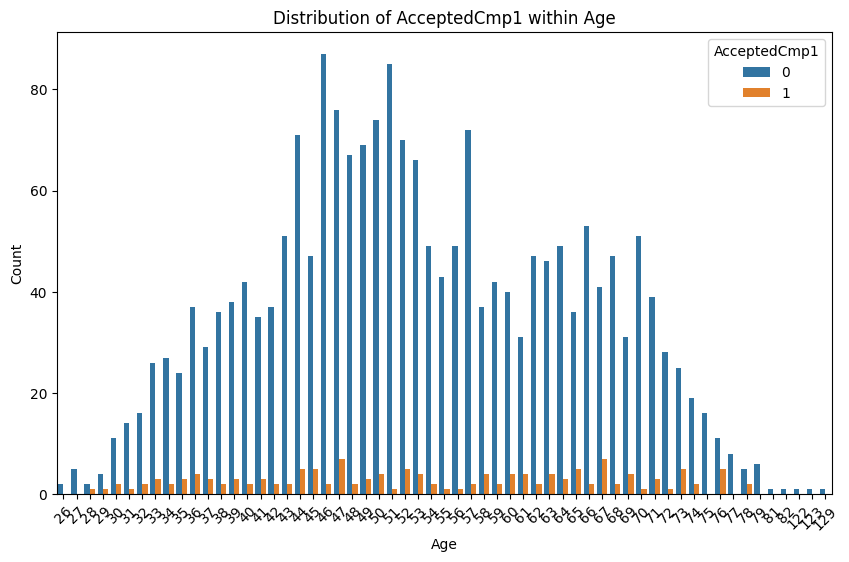

########## AcceptedCmp2 #############


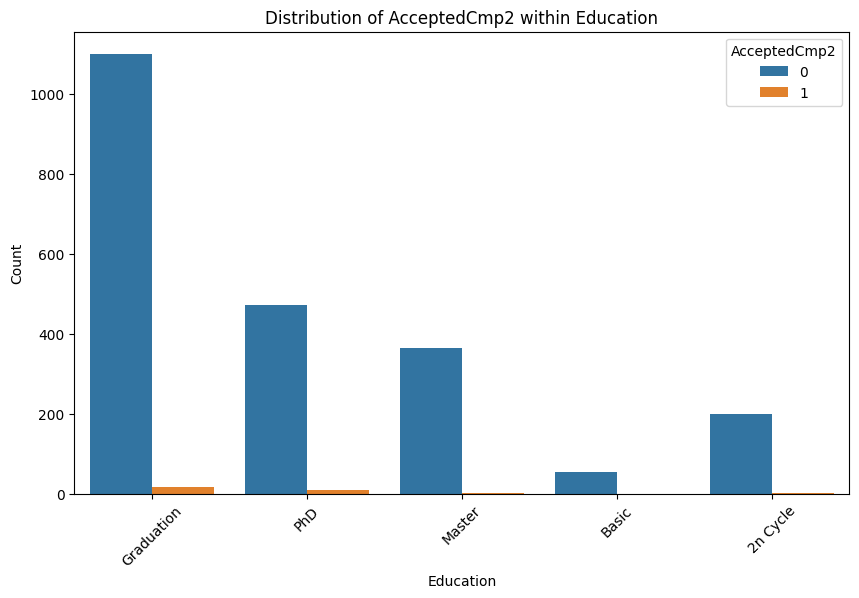

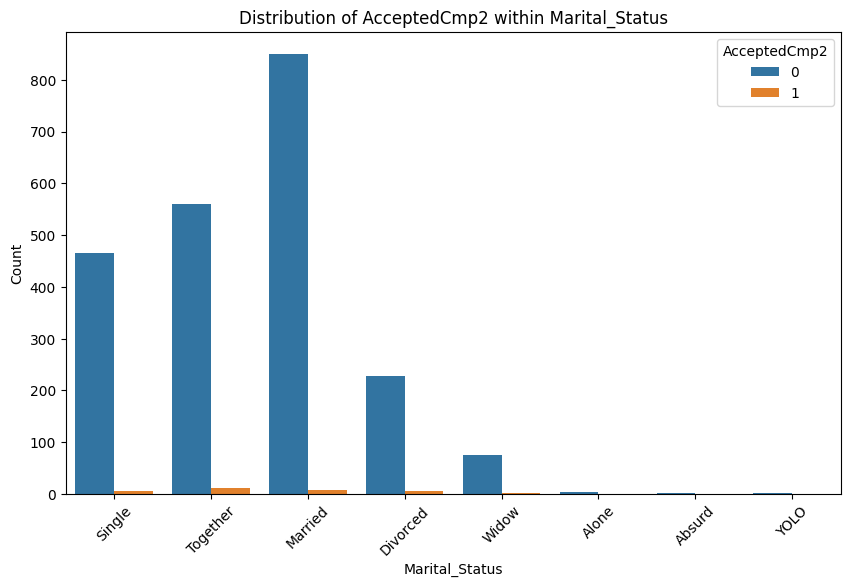

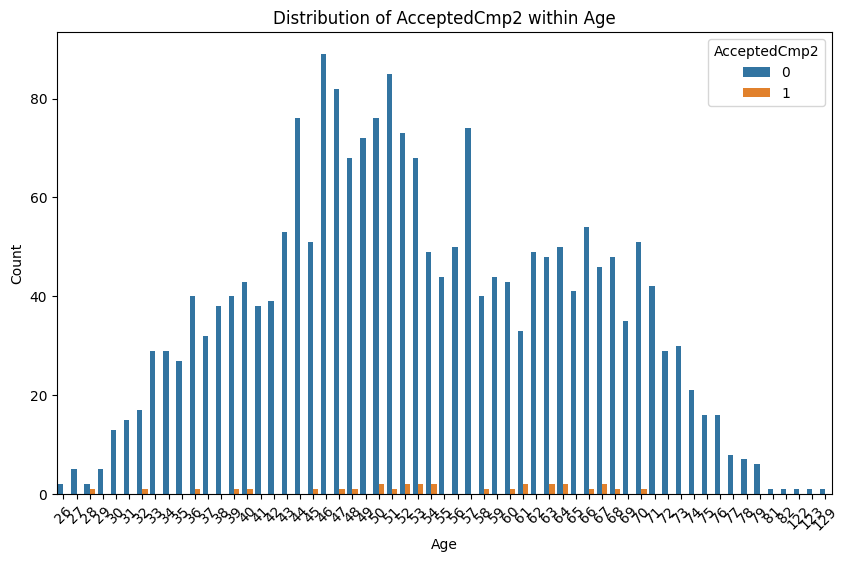

########## AcceptedCmp3 #############


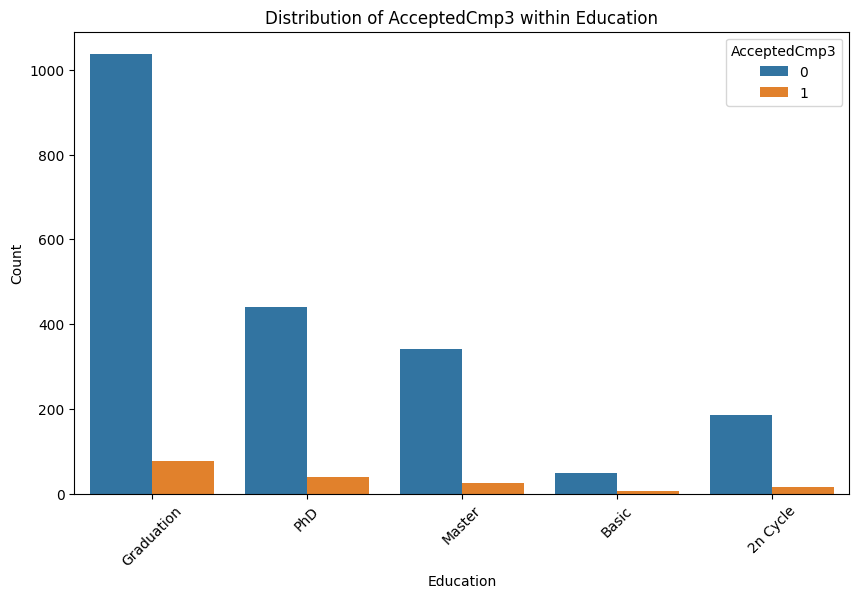

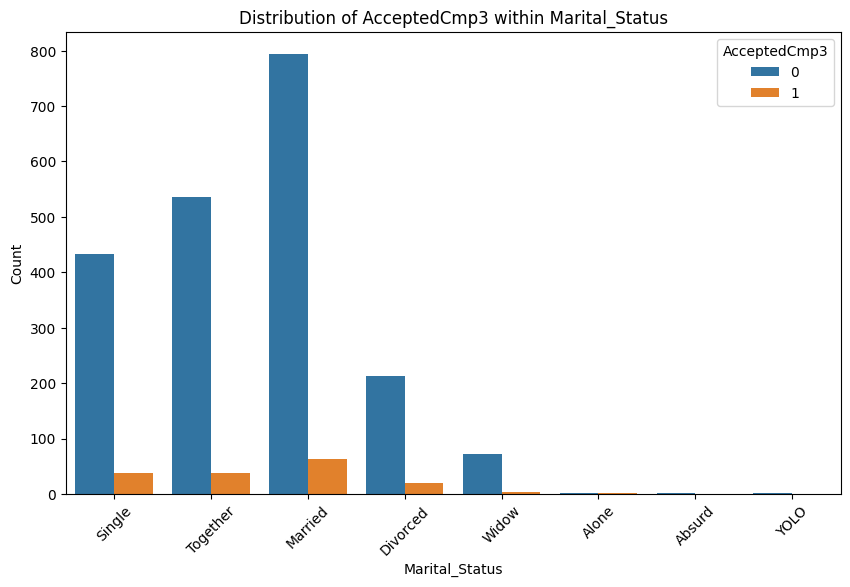

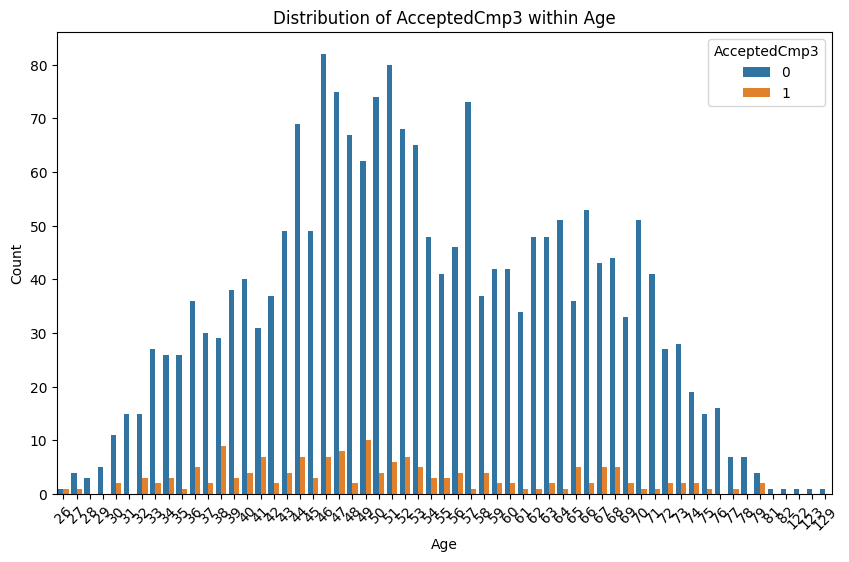

########## AcceptedCmp4 #############


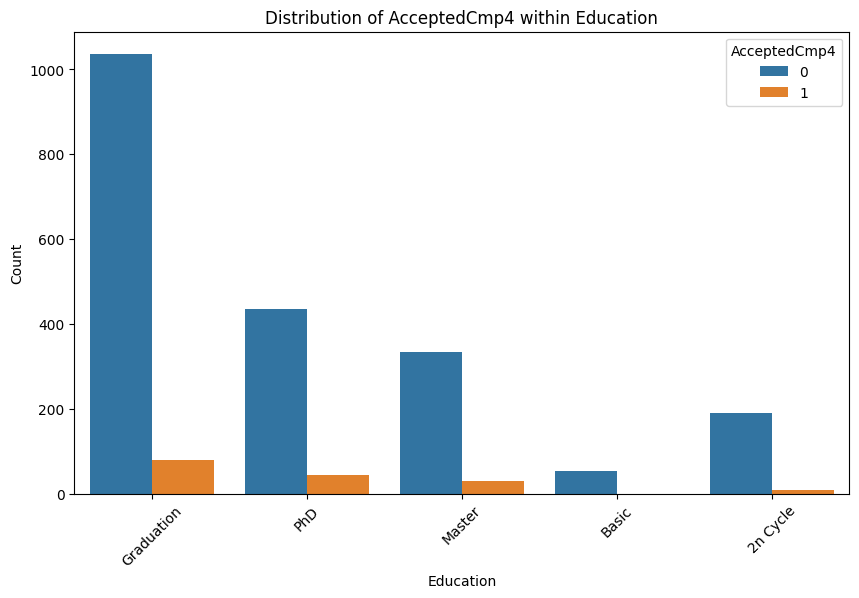

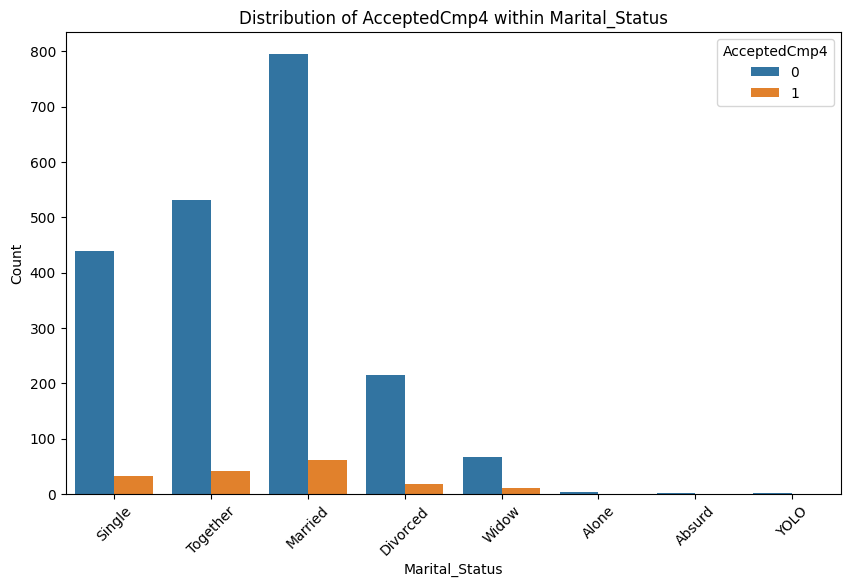

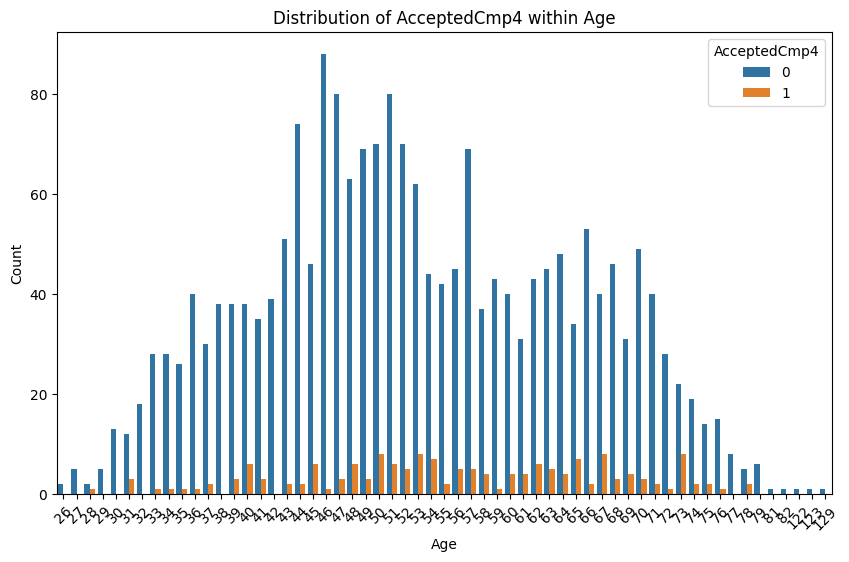

########## AcceptedCmp5 #############


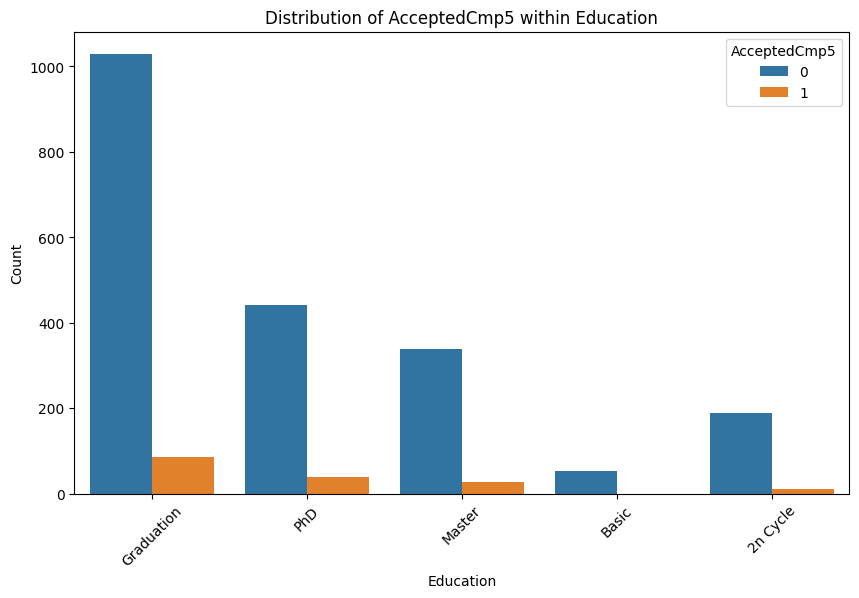

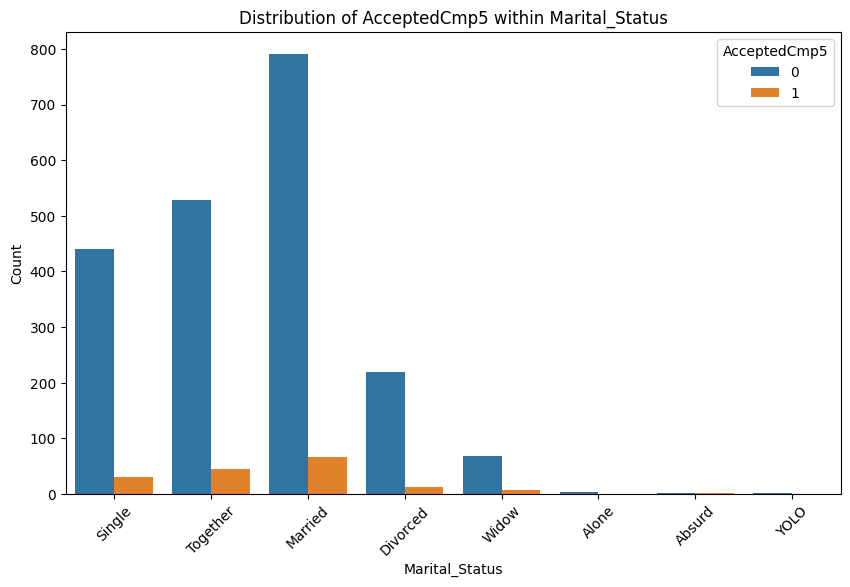

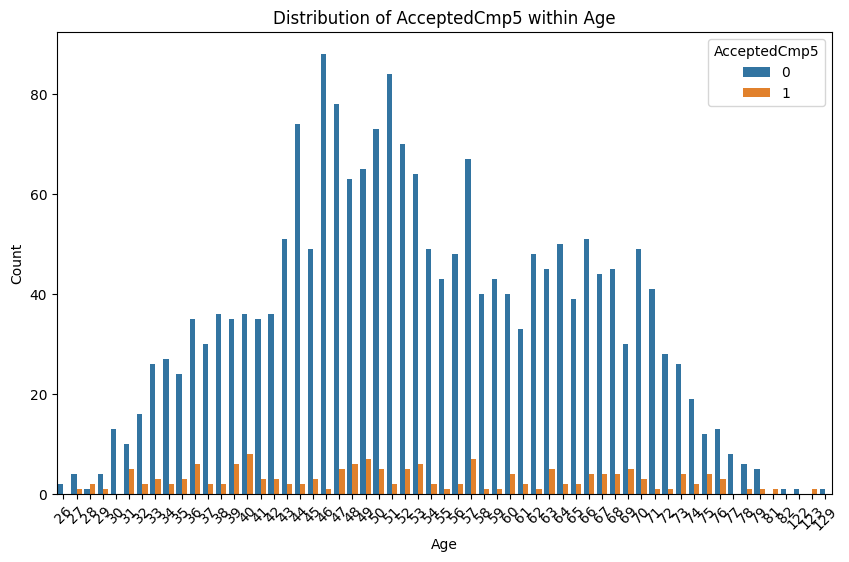

########## Response #############


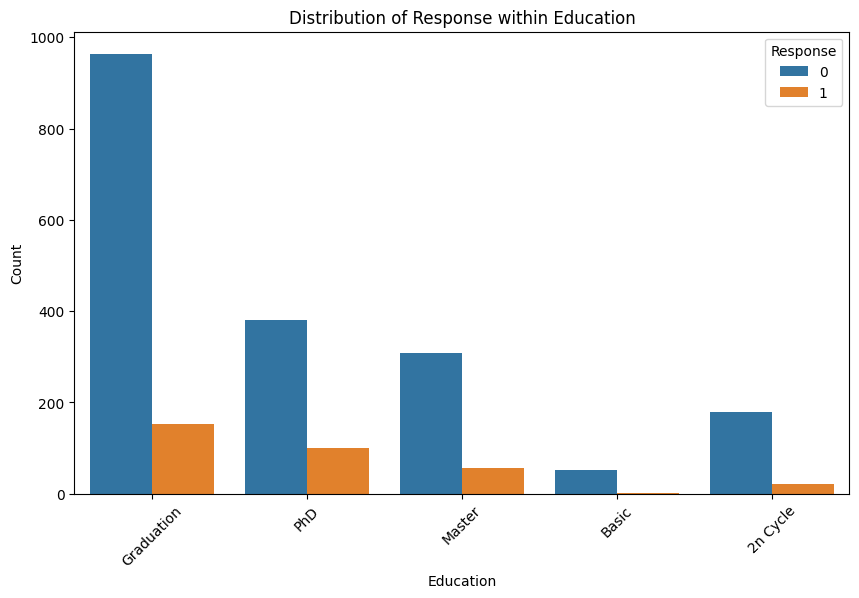

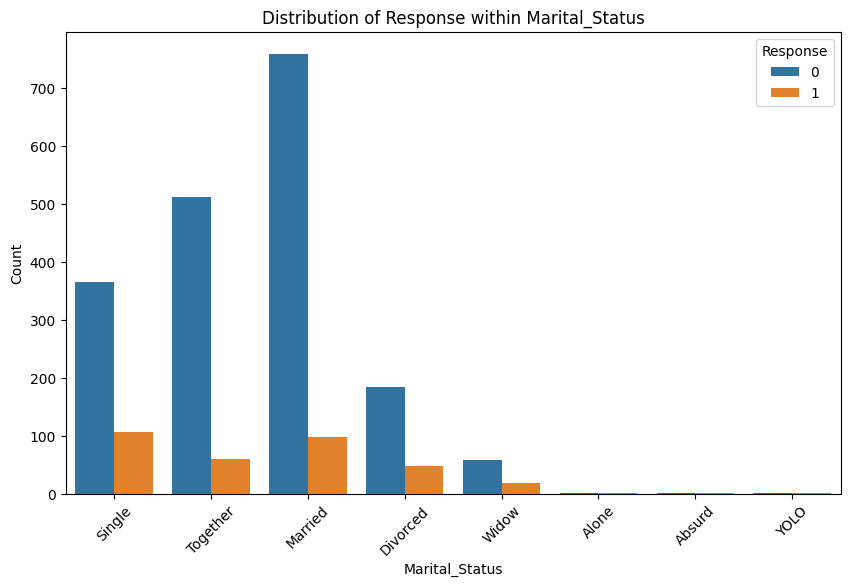

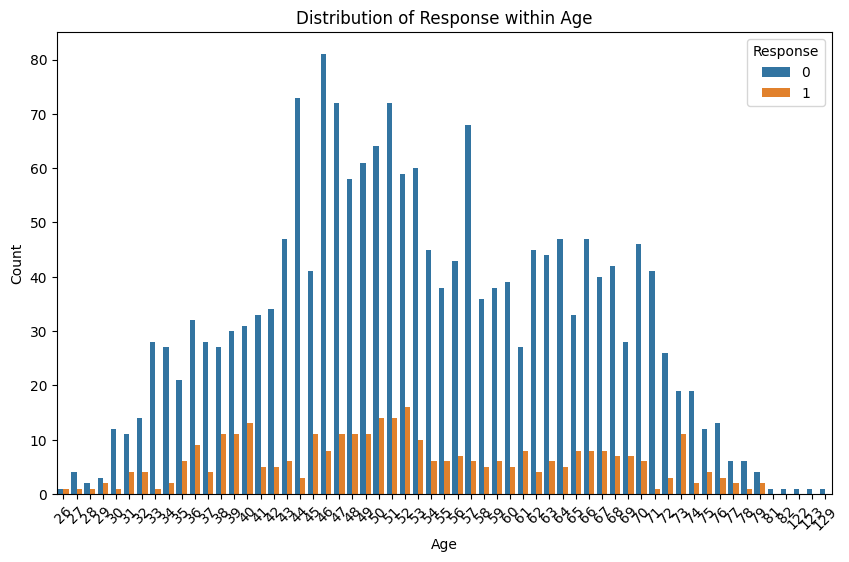

In [13]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
for c_col in campaign_cols:
    print(f"########## {c_col} #############")
    for col in ['Education', 'Marital_Status','Age']:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue=c_col, data=df_cleaned)
        plt.title(f"Distribution of {c_col} within {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.legend(title=c_col, loc="upper right")
        plt.xticks(rotation=45)
        plt.show()

## RFM Segmentation

In this section, we will use the `Frequency` and `Monetary` features created during feature engineering to calculate RFM scores for customer segmentation. Based on these scores, we will categorize customers into meaningful segments:

- **Champions**: Recent and frequent buyers with high monetary value. They are the most valuable customers who engage often and spend significantly.
- **Loyal Customers**: Customers who purchase regularly and are likely to respond positively to engagement efforts. They may not be the highest spenders but demonstrate consistent loyalty.
- **Potential Loyalists**: Customers who have shown interest and could become loyal with the right incentives or engagement.
- **At-Risk**: Customers who have made purchases in the past but haven’t engaged recently. They might need re-engagement efforts to prevent churn.
- **Lost**: Customers who haven’t made purchases in a long time and are unlikely to return without significant re-engagement.

This segmentation allows us to understand different customer behaviors and prioritize them for targeted marketing efforts.


In [14]:
df_cleaned['Frequency'] = df_cleaned['NumPurchases']

df_cleaned['Monetary'] = df_cleaned['Spent']


In [15]:
df_cleaned['R_Score'] = pd.qcut(df_cleaned['Recency'], q=5, labels=[5, 4, 3, 2, 1])
df_cleaned['F_Score'] = pd.qcut(df_cleaned['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
df_cleaned['M_Score'] = pd.qcut(df_cleaned['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

In [16]:
df_cleaned['RFM_Score'] = df_cleaned['R_Score'].astype(int) + df_cleaned['F_Score'].astype(int) + df_cleaned['M_Score'].astype(int)

In [17]:

def segment_customers(row):
    if row['RFM_Score'] >= 13:
        return 'Champions'
    elif row['RFM_Score'] >= 10:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 7:
        return 'Potential Loyalists'
    elif row['RFM_Score'] >= 4:
        return 'At-Risk'
    else:
        return 'Lost'

df_cleaned['Segment'] = df_cleaned.apply(segment_customers, axis=1)

## Visualization of Segments and Extraction of Customer Information

In this section, we will visualize the distribution of customer segments to gain insights into each group’s size and characteristics. Through these visualizations, we aim to identify key behaviors, preferences, and patterns within each segment.

Additionally, we will extract detailed information for each segment to better understand customer demographics and purchase behavior. This analysis helps in tailoring marketing strategies and optimizing engagement for each group.


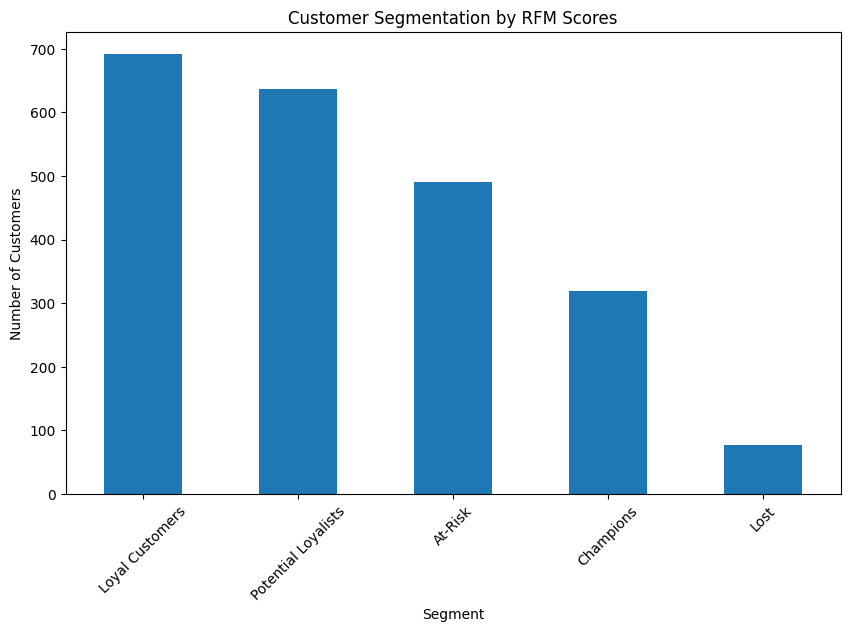

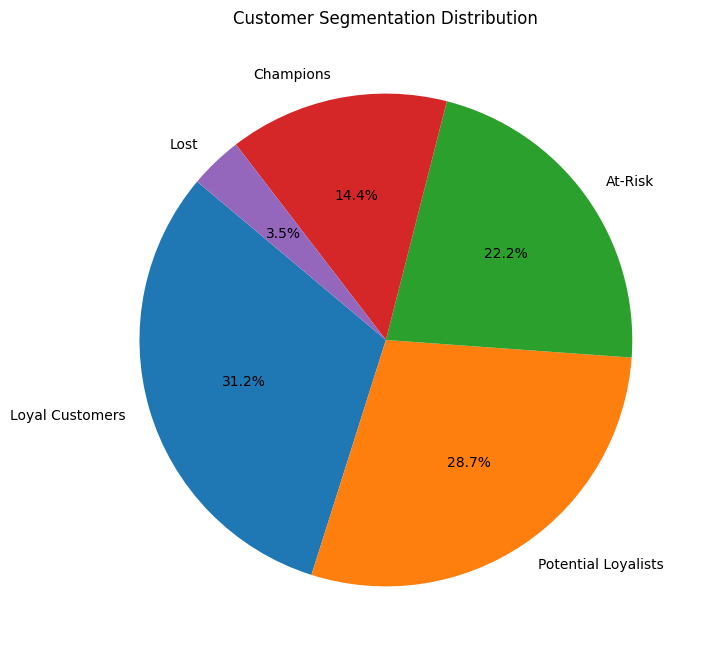

In [18]:
segment_counts = df_cleaned['Segment'].value_counts()
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar')
plt.title('Customer Segmentation by RFM Scores')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 8))
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Customer Segmentation Distribution')
plt.ylabel('')  
plt.show()

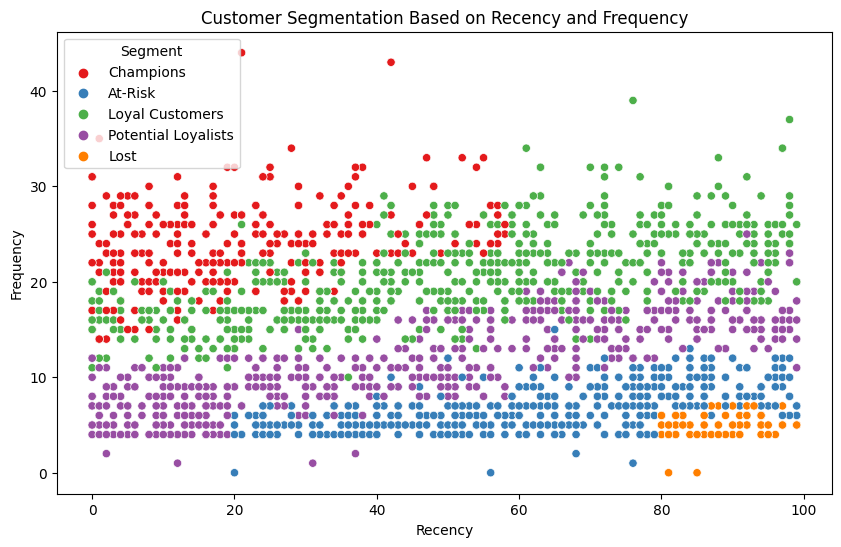

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Recency', y='Frequency', hue='Segment', palette='Set1')
plt.title('Customer Segmentation Based on Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment')
plt.show()

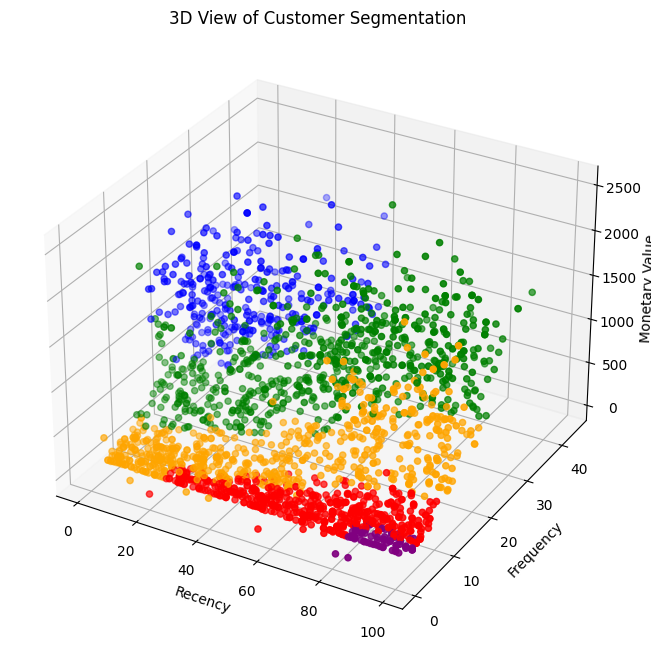

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = {'Champions': 'blue', 'Loyal Customers': 'green', 'Potential Loyalists': 'orange', 'At-Risk': 'red', 'Lost': 'purple'}

ax.scatter(df_cleaned['Recency'], df_cleaned['Frequency'], df_cleaned['Monetary'], c=df_cleaned['Segment'].map(colors), label=df_cleaned['Segment'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.title('3D View of Customer Segmentation')
plt.show()

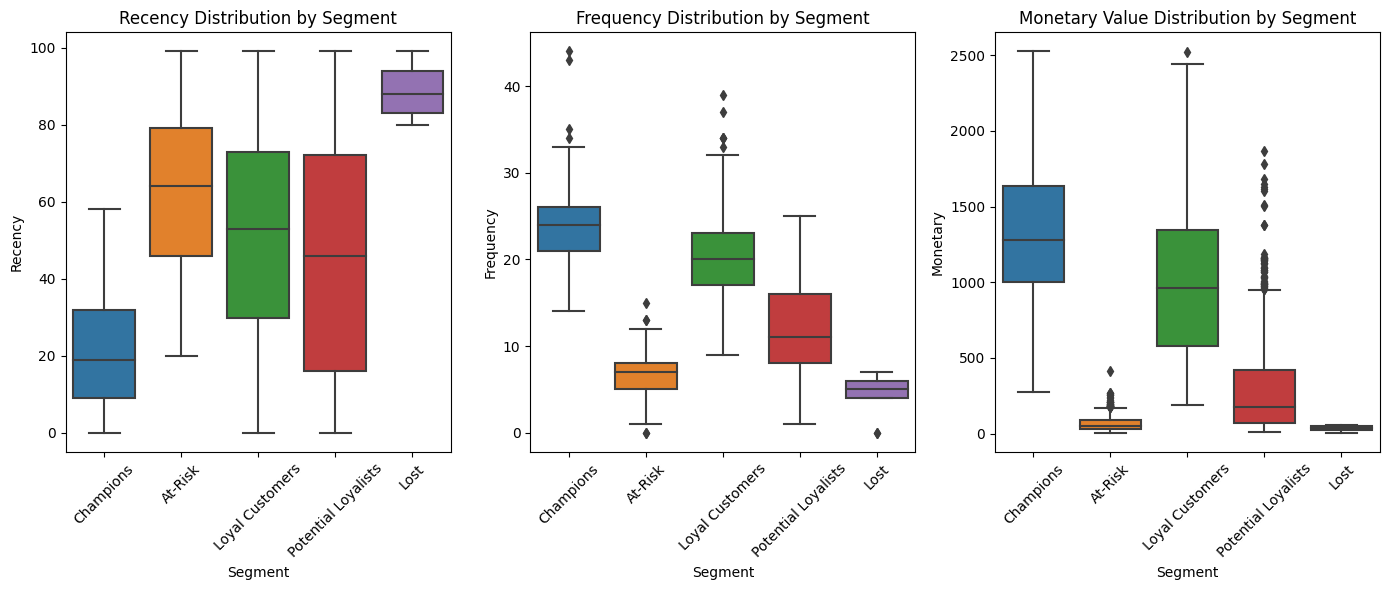

In [21]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 3, 1)
sns.boxplot(x='Segment', y='Recency', data=df_cleaned)
plt.title('Recency Distribution by Segment')
plt.xticks(rotation=45)


plt.subplot(1, 3, 2)
sns.boxplot(x='Segment', y='Frequency', data=df_cleaned)
plt.title('Frequency Distribution by Segment')
plt.xticks(rotation=45)


plt.subplot(1, 3, 3)
sns.boxplot(x='Segment', y='Monetary', data=df_cleaned)
plt.title('Monetary Value Distribution by Segment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Campaigns receptivity

In [22]:
receptivity = df_cleaned.groupby('Segment')['Total_Campaigns_Accepted'].mean()
print(receptivity)

Segment
At-Risk                0.122200
Champions              0.990596
Lost                   0.077922
Loyal Customers        0.627168
Potential Loyalists    0.279435
Name: Total_Campaigns_Accepted, dtype: float64


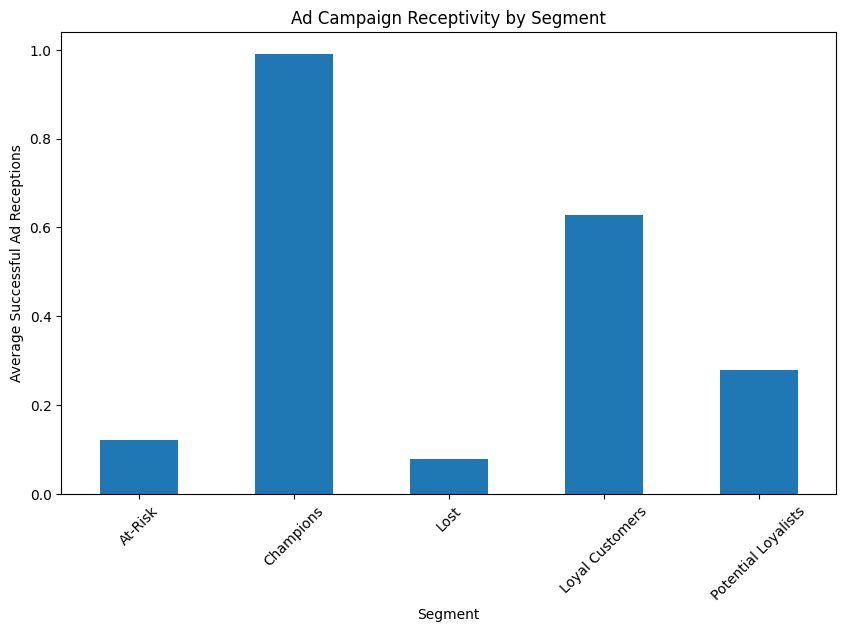

In [23]:
plt.figure(figsize=(10, 6))
receptivity.plot(kind='bar')
plt.title('Ad Campaign Receptivity by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Successful Ad Receptions')
plt.xticks(rotation=45)
plt.show()

In [24]:
ad_receptivity =df_cleaned.groupby('Segment')[campaign_cols].mean()
ad_receptivity

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Segment,,,,,,
At-Risk,0.000000,0.004073,0.065173,0.008147,0.000000,0.044807
Champions,0.181818,0.028213,0.097179,0.141066,0.210031,0.332288
Lost,0.000000,0.000000,0.077922,0.000000,0.000000,0.000000
Loyal Customers,0.099711,0.023121,0.076590,0.124277,0.121387,0.182081
Potential Loyalists,0.023548,0.004710,0.064364,0.045526,0.017268,0.124019


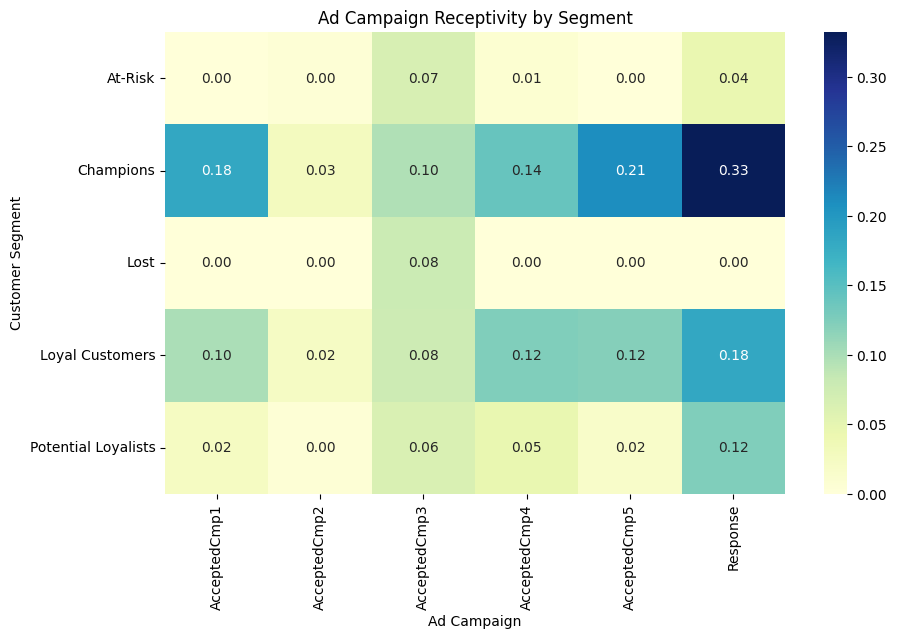

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(ad_receptivity, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Ad Campaign Receptivity by Segment')
plt.xlabel('Ad Campaign')
plt.ylabel('Customer Segment')
plt.show()

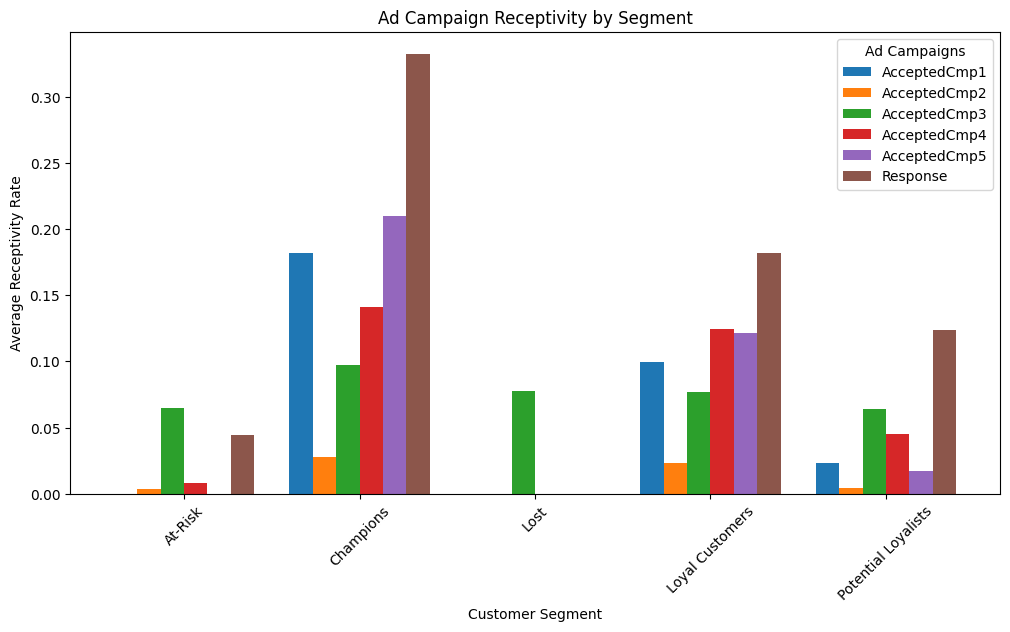

In [26]:
ad_receptivity.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Ad Campaign Receptivity by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Receptivity Rate')
plt.legend(title='Ad Campaigns', loc='upper right')
plt.xticks(rotation=45)
plt.show()

### Demographics in Segments

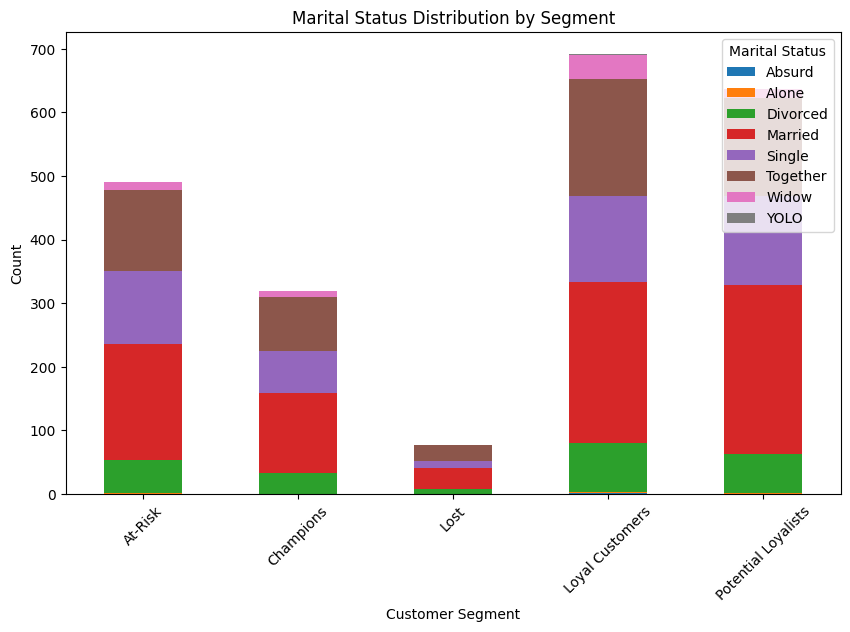

In [27]:
marital_status_counts = df_cleaned.groupby(['Segment', 'Marital_Status']).size().unstack()

marital_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Marital Status Distribution by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.legend(title='Marital Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

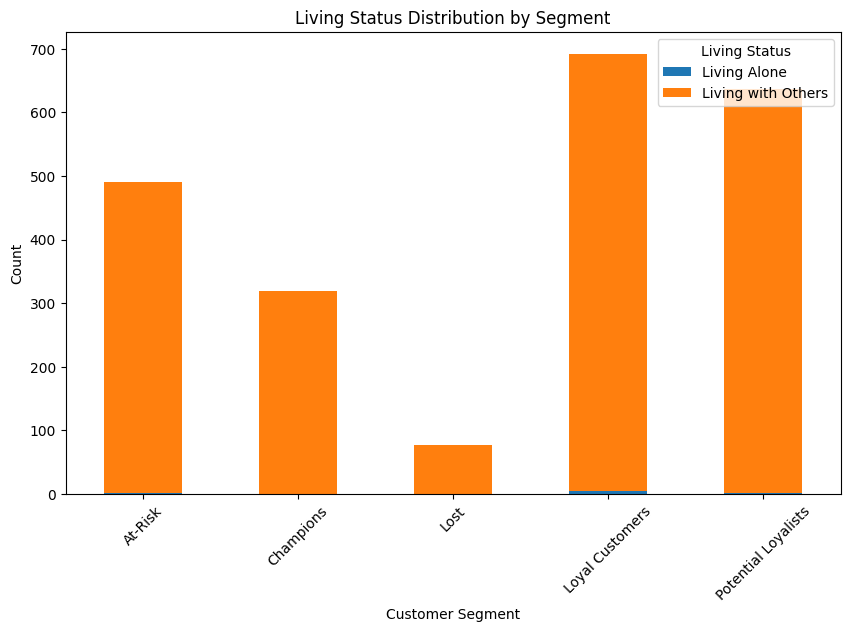

In [28]:
living_status_counts = df_cleaned.groupby(['Segment', 'Living_Status']).size().unstack()

living_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Living Status Distribution by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.legend(title='Living Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

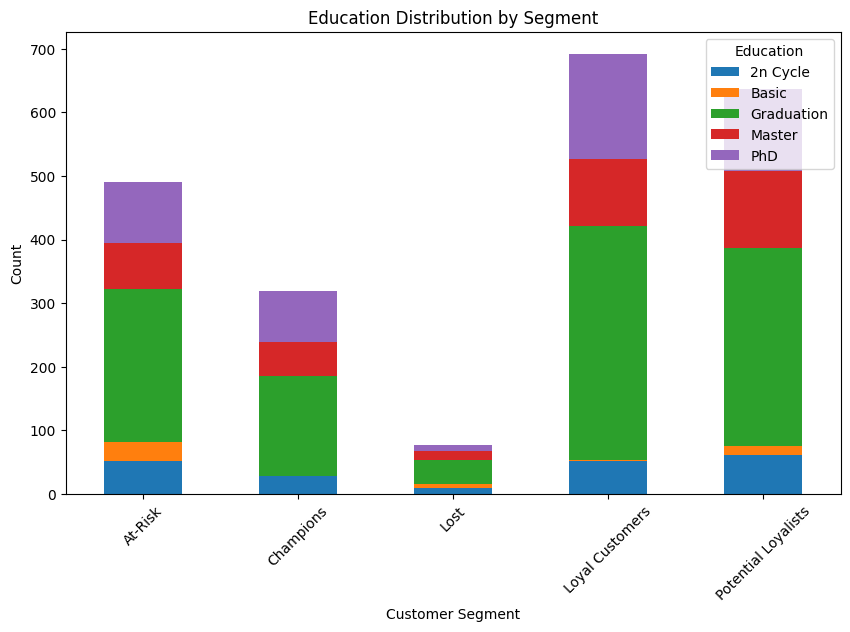

In [29]:
education_counts = df_cleaned.groupby(['Segment', 'Education']).size().unstack()

education_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Education Distribution by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.legend(title='Education', loc='upper right')
plt.xticks(rotation=45)
plt.show()


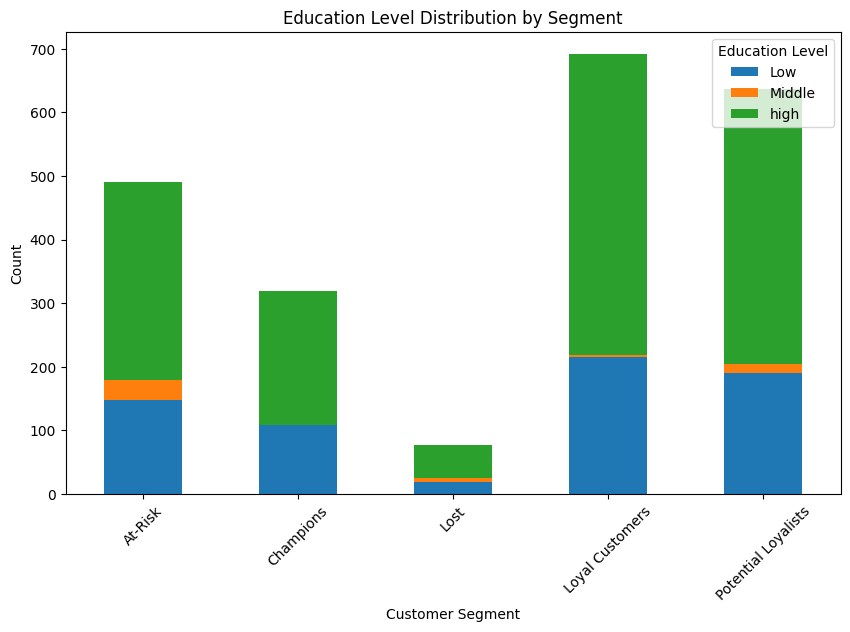

In [30]:
education_level_counts = df_cleaned.groupby(['Segment', 'Education_level']).size().unstack()


education_level_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Education Level Distribution by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.legend(title='Education Level', loc='upper right')
plt.xticks(rotation=45)
plt.show()

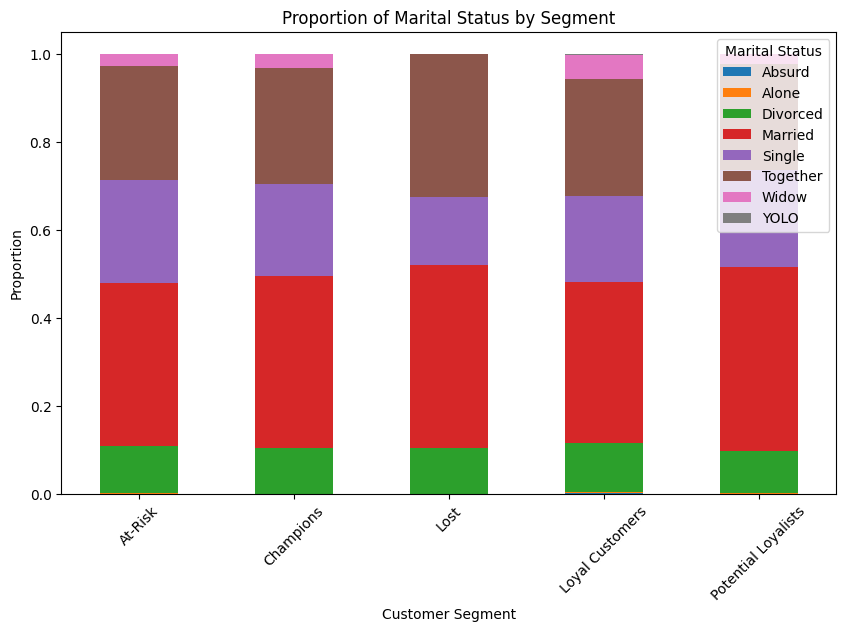

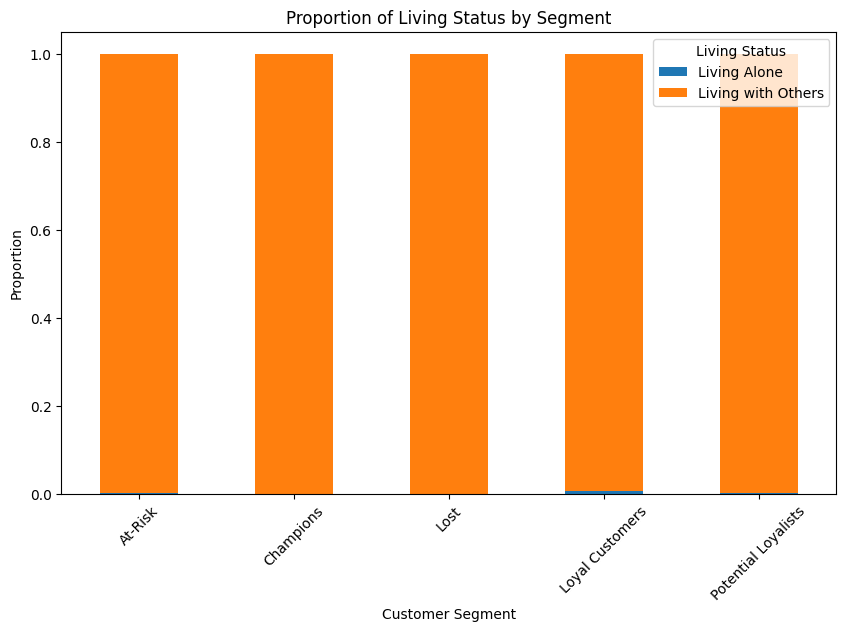

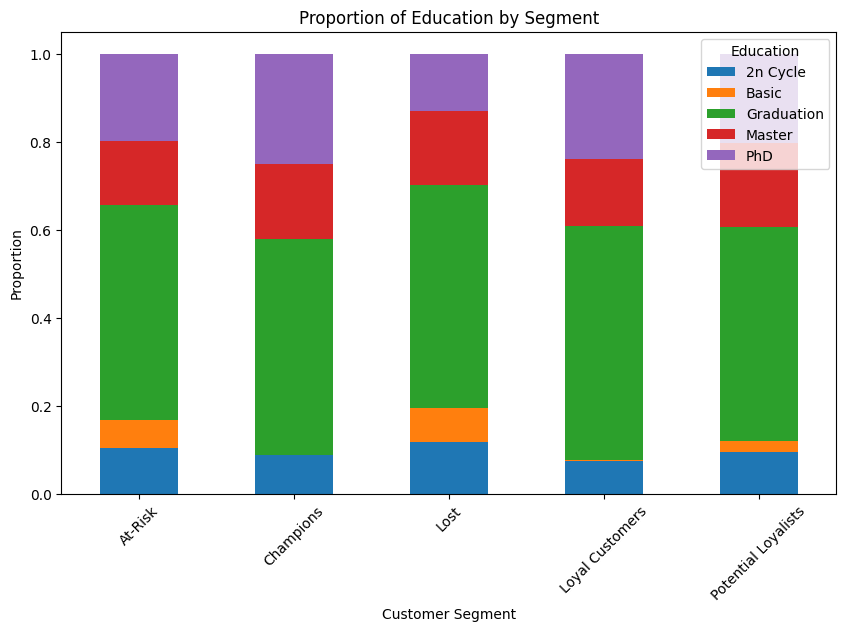

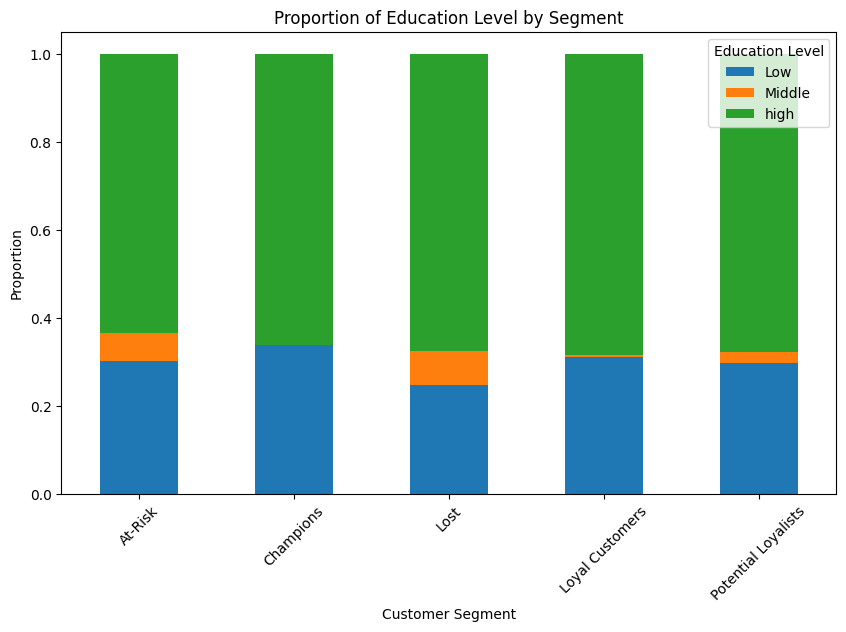

In [31]:

marital_status_prop = marital_status_counts.div(marital_status_counts.sum(axis=1), axis=0)
living_status_prop = living_status_counts.div(living_status_counts.sum(axis=1), axis=0)

education_prop = education_counts.div(education_counts.sum(axis=1), axis=0)
education_level_prop = education_level_counts.div(education_level_counts.sum(axis=1), axis=0)



marital_status_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Marital Status by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Proportion')
plt.legend(title='Marital Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

living_status_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Living Status by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Proportion')
plt.legend(title='Living Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()



education_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Education by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Proportion')
plt.legend(title='Education', loc='upper right')
plt.xticks(rotation=45)
plt.show()

education_level_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Education Level by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Proportion')
plt.legend(title='Education Level', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Conclusion

In this notebook, we successfully segmented customers using RFM analysis, gaining valuable insights into their purchasing behavior and engagement patterns. By categorizing customers into segments such as **Champions**, **Loyal Customers**, **Potential Loyalists**, **At-Risk**, and **Lost**, we identified key groups for targeted marketing strategies.

With these insights, future ad campaigns can be optimized to reach specific customer segments more effectively, enhancing campaign efficiency and improving conversion rates. For example, by studying why Campaign 3 resonated with **Lost** customers, we can refine future marketing efforts to better re-engage similar customers. This segmentation approach enables us to focus on high-value customers, re-engage those at risk, and foster stronger, personalized connections with our entire customer base.

